A/B TESTING PROJECT: 

Measuring the Effectiveness of a New Landing Page

This project aims to evaluate whether a new landing page leads to a higher user conversion rate compared to the existing (control) page. Using a real-world dataset from a randomized controlled experiment, we perform the following steps:

- Clean and prepare the data by removing inconsistent and duplicate entries
- Calculate conversion rates for the control and treatment groups
- Apply statistical hypothesis testing (Z-Test for proportions) to determine significance
- Visualize the results for clearer interpretation

The goal is to make a data-driven decision on whether implementing the new landing page would improve conversion performance.

STEP-1: DATA OVERVIEW

In [2]:
# Import necessary libraries
import pandas as pd

# Read the dataset
df = pd.read_csv(r"C:\Users\ezoyd\Downloads\archive (1)\ab_data.csv")

# Show the first 5 rows of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
# Check for missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

- The dataset contains 294,478 rows and 5 columns.
- There are no missing values in any column.
- There are no duplicate rows.
- Data types are appropriate: user IDs are integers, timestamps are strings, and group/page labels are objects (categorical).

✅ The dataset is clean and ready for initial filtering and analysis.

STEP-2 : DATA CLEANING

In [6]:
# Check if 'group' and 'landing_page' are consistent
df.query("group == 'treatment' and landing_page != 'new_page'").shape[0]
df.query("group == 'control' and landing_page != 'old_page'").shape[0]

1928

In [7]:
# Remove inconsistent rows
df_clean = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page') |
              (df['group'] == 'control') & (df['landing_page'] == 'old_page')]

In [8]:
# Drop duplicate user_ids
df_clean = df_clean.drop_duplicates(subset='user_id')

In [9]:
# Final check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


- 1,928 inconsistent rows were found where the group assignment did not match the landing page (e.g., treatment group seeing the old page). These rows were removed.
- Duplicate user IDs were dropped to ensure each user appears only once.
- The cleaned dataset now contains 290,584 unique and consistent observations.

✅ The dataset is now ready for accurate conversion analysis and A/B testing.

STEP-3: CONVERSION ANALYSIS

In [10]:
# Conversion rate by group
conversion_rates = df_clean.groupby('group')['converted'].mean()
conversion_rates

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [11]:
# Count by group
df_clean.groupby('group').size()

group
control      145274
treatment    145310
dtype: int64

- The control group has a conversion rate of 12.04%.
- The treatment group has a slightly lower conversion rate of 11.88%.
- The sample sizes are almost equal: 145,274 (control) and 145,310 (treatment).

✅ Although the conversion rates are very close, we cannot determine statistical significance without further testing.

STEP-4:  A/B TEST – PROPORTION Z-TEST

In [12]:
from statsmodels.stats.proportion import proportions_ztest

# Success counts
success = df_clean.groupby('group')['converted'].sum()
n_obs = df_clean.groupby('group')['converted'].count()

In [13]:
# Perform z-test
z_stat, p_val = proportions_ztest(count=success, nobs=n_obs, alternative='two-sided')

z_stat, p_val

In [15]:
# Interpret the result
if p_val < 0.05:
    print("Reject the null hypothesis - significant difference.")
else:
    print("Fail to reject the null hypothesis - no significant difference.")

Fail to reject the null hypothesis - no significant difference.


- Z-statistic = 1.31
- p-value = 0.1899
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis.

✅ There is no statistically significant difference between the conversion rates of the control and treatment groups. The new landing page does not appear to perform better than the old one.

STEP-5: DATA VISUALIZATION

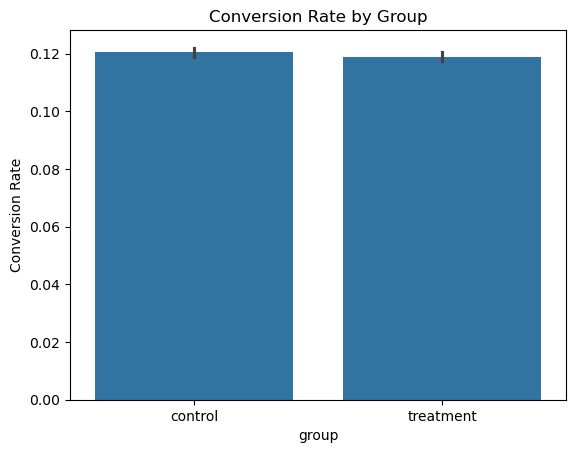

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for conversion rates
sns.barplot(data=df_clean, x='group', y='converted')
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

- The bar chart shows the conversion rates for both the control and treatment groups.
- Both bars are nearly the same height, indicating very similar conversion performance.
- The small vertical lines on top of the bars represent confidence intervals, and they overlap, which visually supports the statistical test result:

→ There is no significant difference between the groups.

✅ The visualization confirms that the new page design does not outperform the old one in terms of conversion.

CONCLUSION

- After cleaning the dataset and conducting an A/B test using a two-sided Z-test, we found no statistically significant difference between the conversion rates of the control and treatment groups (p-value = 0.1899). Although the control group had a slightly higher conversion rate (12.04%) compared to the treatment group (11.88%), the difference is not large enough to support implementing the new landing page.

- Based on the data and analysis, I recommend keeping the existing landing page, as the new version does not show a meaningful improvement in user conversions.



📌 Project by: Ezo Yedigöl  
🔗 [LinkedIn](https://www.linkedin.com/in/ezo-yedig%C3%B6l-aa7947202) | 📧 ezoydgll@gmail.com  
📂 GitHub Repo: [View on GitHub](https://github.com/ezoyedigol/Portfolio/blob/2111625c36000f706cb533d9e32b1e2e9366dd5e/Python/)